<a href="https://colab.research.google.com/github/MoisesTedeschi/COVID-19/blob/master/Informa%C3%A7%C3%B5es_di%C3%A1rias_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O script a seguir tem como base os projetos de: ["Paluch Guilherme"](https://github.com/gorpo/COVID-19) e ["João Victor"](https://github.com/Riquinho/coronavirus) da comunidade Python Brasil.

In [0]:
import requests, urllib.request, json
import matplotlib.pyplot as plt
import numpy as np

#INFORMAÇÕES DIÁRIAS DE CASOS CONFIRMADOS, RECUPERADOS E ÓBITOS

In [2]:
response = urllib.request.urlopen('https://pomber.github.io/covid19/timeseries.json')
data = json.loads(response.read())

print('Lista de Paises disponiveis: \n')
print(list(data.keys()))

Lista de Paises disponiveis: 

['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden', 'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colombia', 'Costa Rica', 'Peru', 'Serbia', 'Slovakia', 'Togo', 'Malta', 'Martinique', 'Bulga

In [0]:
pais1 = "Brazil"
pais2 = "Italy"

In [0]:
def coronavirus_brasil(pais1, pais2):
  url = "https://pomber.github.io/covid19/timeseries.json"
  requisicao = requests.get(url, timeout=3000)
  resposta = requisicao.json()
  dicionario_pais1 = resposta[pais1]
  dados_pais1 = dicionario_pais1[-1]

  dicionario_pais2 = resposta[pais2]
  dados_pais2 = dicionario_pais2[-1]

  print("Coronavírus COVID-19 na Itália\n")
  print(f"""Pais: {pais2}
Data: {dados_pais2['date']}
Confirmados: {dados_pais2['confirmed']}
Mortos: {dados_pais2['deaths']}
Recuperados: {dados_pais2['recovered']}""")
  
  print("\n\nCoronavírus COVID-19 no Brasil\n")
  print(f"""Pais: {pais1}
Data: {dados_pais1['date']}
Confirmados: {dados_pais1['confirmed']}
Mortos: {dados_pais1['deaths']}
Recuperados: {dados_pais1['recovered']}""")


In [5]:
coronavirus_brasil(pais1, pais2)

Coronavírus COVID-19 na Itália

Pais: Italy
Data: 2020-3-18
Confirmados: 35713
Mortos: 2978
Recuperados: 4025


Coronavírus COVID-19 no Brasil

Pais: Brazil
Data: 2020-3-18
Confirmados: 372
Mortos: 3
Recuperados: 2


#GRÁFICO - CRESCIMENTO DE INFECTADOS

In [6]:
dados_confirmed_ps1 = []
dados_confirmed_ps2 = []

menor_data = len(data[pais1]) -1 if len(data[pais1]) < len(data[pais2]) else len(data[pais2]) -1
print('A menor data serve de inicio da contagem: ' + str(menor_data))
while menor_data  > 0:
  
  confirmed_ps1 = data[pais1][menor_data]['confirmed']	 
  confirmed_ps2 = data[pais2][menor_data]['confirmed']
  
  dados_confirmed_ps1.append(confirmed_ps1)
  dados_confirmed_ps2.append(confirmed_ps2)

  menor_data  = menor_data - 1

dados_confirmed_ps1.reverse()
dados_confirmed_ps2.reverse()

print('\nDados Capturados: \n')
print(dados_confirmed_ps1)
print(dados_confirmed_ps2)
print('\n')

menor_data = len(data[pais1]) -1 if len(data[pais1]) < len(data[pais2]) else len(data[pais2]) -1
print('Dias: ' + str(menor_data))


for i in list(range(menor_data)):
  try:
    dados_confirmed_ps1.remove(0)
  except:
    pass
  try:
    dados_confirmed_ps2.remove(0)
  except:
    pass

print('\nDados Capturados(Removendo os Zeros): \n')
print(dados_confirmed_ps1)
print(dados_confirmed_ps2)
print('\n')


faltantes_ps1 = menor_data - len(dados_confirmed_ps1)
print('Dados Faltantes no País 1: ' + str(faltantes_ps1))

faltantes_ps2 = menor_data - len(dados_confirmed_ps2)
print('Dados Faltantes no País 2: ' + str(faltantes_ps2))


for i in range(faltantes_ps1):
  num = np.average(dados_confirmed_ps1, weights  = list(range(len(dados_confirmed_ps1))))
  dados_confirmed_ps1.append(dados_confirmed_ps1[-1] + num)

for i in range(faltantes_ps2):
  num = np.average(dados_confirmed_ps2,weights  = list(range(len(dados_confirmed_ps2))))
  dados_confirmed_ps2.append(dados_confirmed_ps2[-1] + num)

print(dados_confirmed_ps1)
print(dados_confirmed_ps2)	

A menor data serve de inicio da contagem: 56

Dados Capturados: 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 4, 4, 13, 13, 20, 25, 31, 38, 52, 151, 151, 162, 200, 321, 372]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713]


Dias: 56

Dados Capturados(Removendo os Zeros): 

[1, 1, 1, 2, 2, 2, 2, 4, 4, 13, 13, 20, 25, 31, 38, 52, 151, 151, 162, 200, 321, 372]
[2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 20, 62, 155, 229, 322, 453, 655, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 12462, 17660, 21157, 24747, 27980, 31506, 35713]


Dados Faltantes no País 1: 34
Dados Faltantes no País 2: 8
[1, 1, 1, 2, 2, 2, 2, 4, 4, 13, 13, 20, 25, 31, 38, 52, 151, 151, 162, 20

O script pega o numero de dias de infectados em ambos os paises e
projeta o crescimento dos infectados por dias (em ambos os paises). Caso algum
pais tenha menos dias de registro, o calculo da projecao e realizado por media
ponderada.


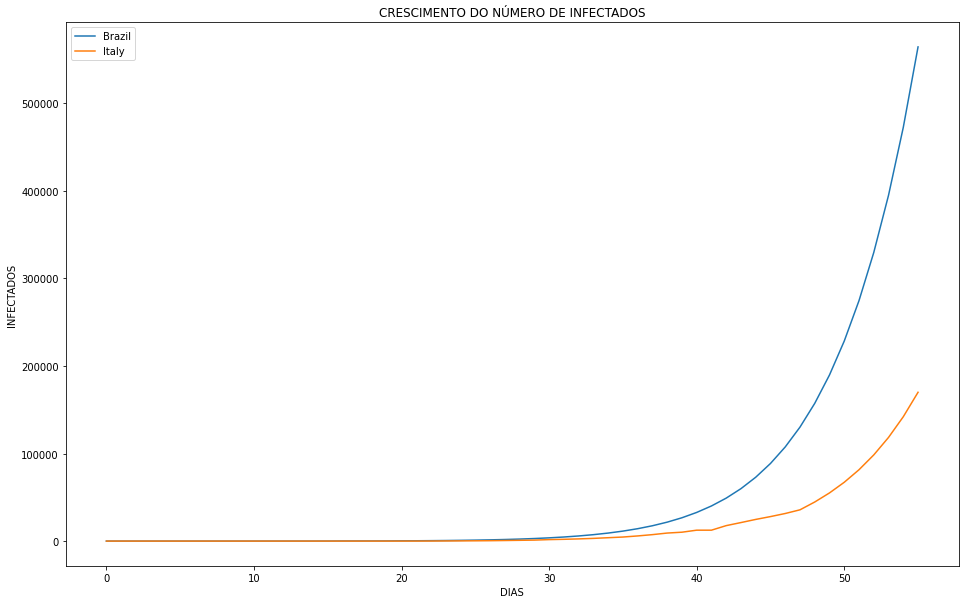

In [7]:
print('''O script pega o numero de dias de infectados em ambos os paises e
projeta o crescimento dos infectados por dias (em ambos os paises). Caso algum
pais tenha menos dias de registro, o calculo da projecao e realizado por media
ponderada.''') 


fig, ax = plt.subplots(figsize=(16,10))
ax.plot(list(range(menor_data)) , dados_confirmed_ps1, label=str(pais1))
ax.plot(list(range(menor_data)) , dados_confirmed_ps2, label=str(pais2))
ax.set_title('CRESCIMENTO DO NÚMERO DE INFECTADOS')
ax.set_xlabel('DIAS')
ax.set_ylabel('INFECTADOS')
plt.legend(loc='best')
plt.show()	